In [1]:
import sys
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.1, 
Please check our github for the latest update.


Bokan & Ben,
10/1/2019




In [2]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
# glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/'
project_name = "linkage_unspecified"
costumized_glycan_identifier = False
external_profile_naming= False
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, )
keywords_dict

{'project_name': 'linkage_unspecified',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linkage_unspecified_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linkage_unspecified_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linkage_unspecified_substructure_gly

In [3]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [4]:
# reload(pipeline_functions)
from glypy.io.linear_code import loads
meta_name = pd.read_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()
data_type = 'local_glycoct'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)


Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/glycoct/
Saved /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linkage_unspecified_glycan_glycoct_dict.json for future use. You can use "used" in the datatype next time
start parallel parsing 82 glycans
start 1580.1
start 1591.1
start 1375.1
start 1795.1
start 1754.1
start 2040.2
start 1836.1
start 2081.2
1375.1 6 0.07391810417175293
start 2081.1
1580.1 7 0.12073588371276855
start 2156.1
1591.1 7 0.13401293754577637
start 2244.2
1754.1 8 0.2233278751373291
start 2244.1
1795.1 8 0.24766111373901367
start 2244.3
1836.1 8 0.7034430503845215
start 2285.1
2040.2 9 0.7385280132293701
2081.2 9 0.7609360218048096
2156.1 9 0.6550040245056152
start 2326.1
start 2401.1
start 2401.2
2081.1 9 0.70573425

In [29]:
# for i in glycan_dict:
#     plot_glycan_utilities.plot_glycan(glycan_dict[i], label=True, title=i)


apipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, linkage_specific=False, num_processors=8, forced=True)


In [23]:
# glycan_glycoct_dict_addr = keywords_dict['glycan_glycoct_dict_addr']
# substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']
# glycan_substructure_glycoct_dict_addr = keywords_dict['glycan_substructure_glycoct_dict_addr']
# glycan_substructure_dic = glycan_io.load_glycan_substructure_dict_from_json(glycan_substructure_glycoct_dict_addr)
# glycan_dict = glycan_io.load_glycan_dict_from_json(glycan_glycoct_dict_addr)
# merge_substructure_dict = merge_substructure_vec.merge_substructure_dict_pip(
#                     glycan_substructure_dict=glycan_substructure_dic,
#                     glycan_dict=glycan_dict,
#                     linkage_specific=False,
#                     num_processors=8,
#                     output_merged_substructure_glycoct_dict_addr=substructure_glycoct_dict_addr)

In [5]:
_substructure_vec = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linkage_unspecified_substructure_glycoct_dict.json')
_substructure_vec = glycan_io.glycan_str_to_glycan_obj(_substructure_vec)
_substructure_dict = deepcopy(_substructure_vec)
_substructure_vec = glycan_io.substructure_dict_to_substructure_vec(_substructure_vec)




6 2
7 5
8 9
9 15
10 24
11 34
12 42
13 49
14 57
15 66
16 71
17 66
18 51
19 31
20 15
21 5
22 1
543


In [43]:
glycan_substructure_dic = glycan_io.load_glycan_substructure_dict_from_json(keywords_dict['glycan_substructure_glycoct_dict_addr'])


In [24]:
# # reload(glycan_io)
# # reload(merge_substructure_vec)
# # glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
# #                                                                      num_processors=num_processors,
# #                                                                      linkage_specific=linkage_specific, 
# #                                                                      forced=True)
# # merge_substructure_dict

# # _substructure_vec = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/refind_glycan_substructure_glycoct_vec.json')
# # _substructure_vec = glycan_io.glycan_str_to_glycan_obj(_substructure_vec)
# # _substructure_dict = glycan_io.substructure_vec_to_substructure_dict(_substructure_vec)
# # glycan_substructure_dic = glycan_io.load_glycan_substructure_dict_from_json(keywords_dict['glycan_substructure_glycoct_dict_addr'])

# matched_dict = merge_substructure_vec.substructure_matching_wrapper(substructure_=_substructure_dict,
#                                                                                 glycan_substructure_dict=glycan_substructure_dic,
#                                                                                 linkage_specific=False,
#                                                                                 num_processors=8,
#                                                                                 matched_dict_addr=keywords_dict['glycan_substructure_occurance_dict_addr'])
# matched_dict = glycan_io.

In [8]:
# from collections import Counter
# print([item for items, c in Counter(abd_table.index).most_common() for item in [items] * c])


In [51]:
abd_table.to_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'),  )
abd_table.transpose().to_excel(os.path.join(working_addr,'source_data','abundance_table_transposed.xlsx'),  )

# load glycoprofile

In [7]:
import numpy as np
# reload(process_glycoprofiles)
unique_glycan_identifier_to_structure_id=False
external_profile_naming=False
name_to_id_addr = keywords_dict['name_to_id_addr']
abd_table = pd.read_excel(os.path.join(working_addr,'source_data','abundance_table.xlsx'), index_col=0, )
abd_table = abd_table.fillna(0)

abd_array = np.array(abd_table)
remove_col = []
for idex,i in enumerate(abd_array):
    if sum(i)==0:
        remove_col.append(abd_table.index[idex])
abd_table = abd_table.drop(remove_col, axis=0)
naming_abd_dict, profile_columns = glycan_io.abd_table_to_dict(abd_table)


abd_list 62 profile_list 16
62 16


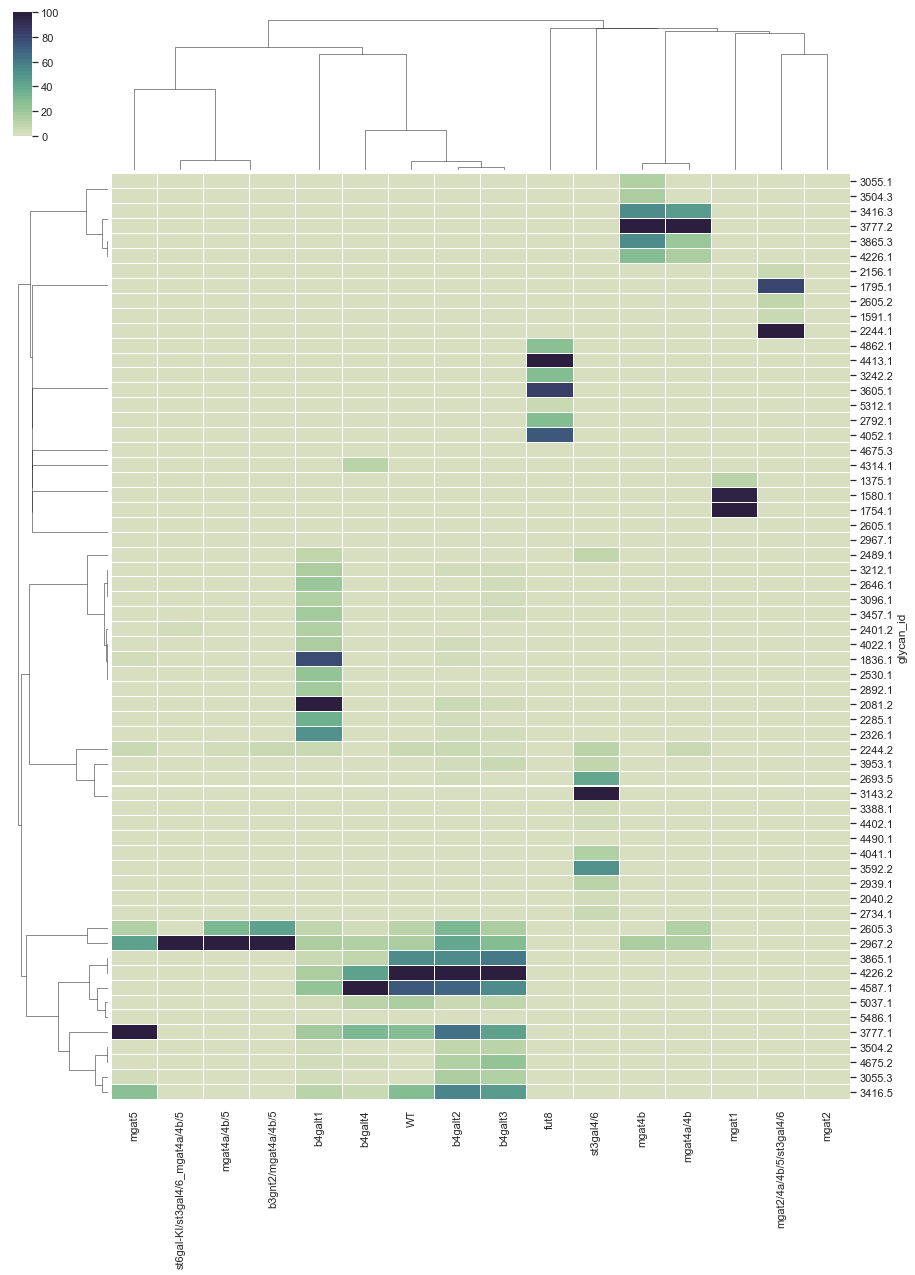

In [8]:
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=abd_table,
                                                              address=keywords_dict[
                                                                          'plot_output_dir'] + 'pseudo_glycan_profile_clustering.eps',
                                                              metric="correlation",
                                                              cmap=sns.cubehelix_palette(40, start=.5, rot=-.75),
                                                              linewidths=0.01,
                                                              figsize=(15,20),
                                                              linecolor='white',
                                                              method='complete')

In [9]:
import umap
reducer = umap.UMAP()

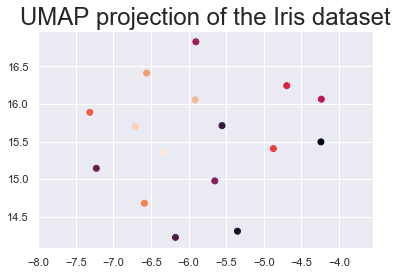

In [10]:
embedding = reducer.fit_transform(abd_table.transpose())
plt.scatter(embedding[:, 0], embedding[:, 1], c=[x for x in range(len(abd_table.transpose().index))])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [11]:
embedding = reducer.fit_transform(motif_abd_table)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[x for x in range(len(motif_abd_table.index))])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

NameError: name 'motif_abd_table' is not defined

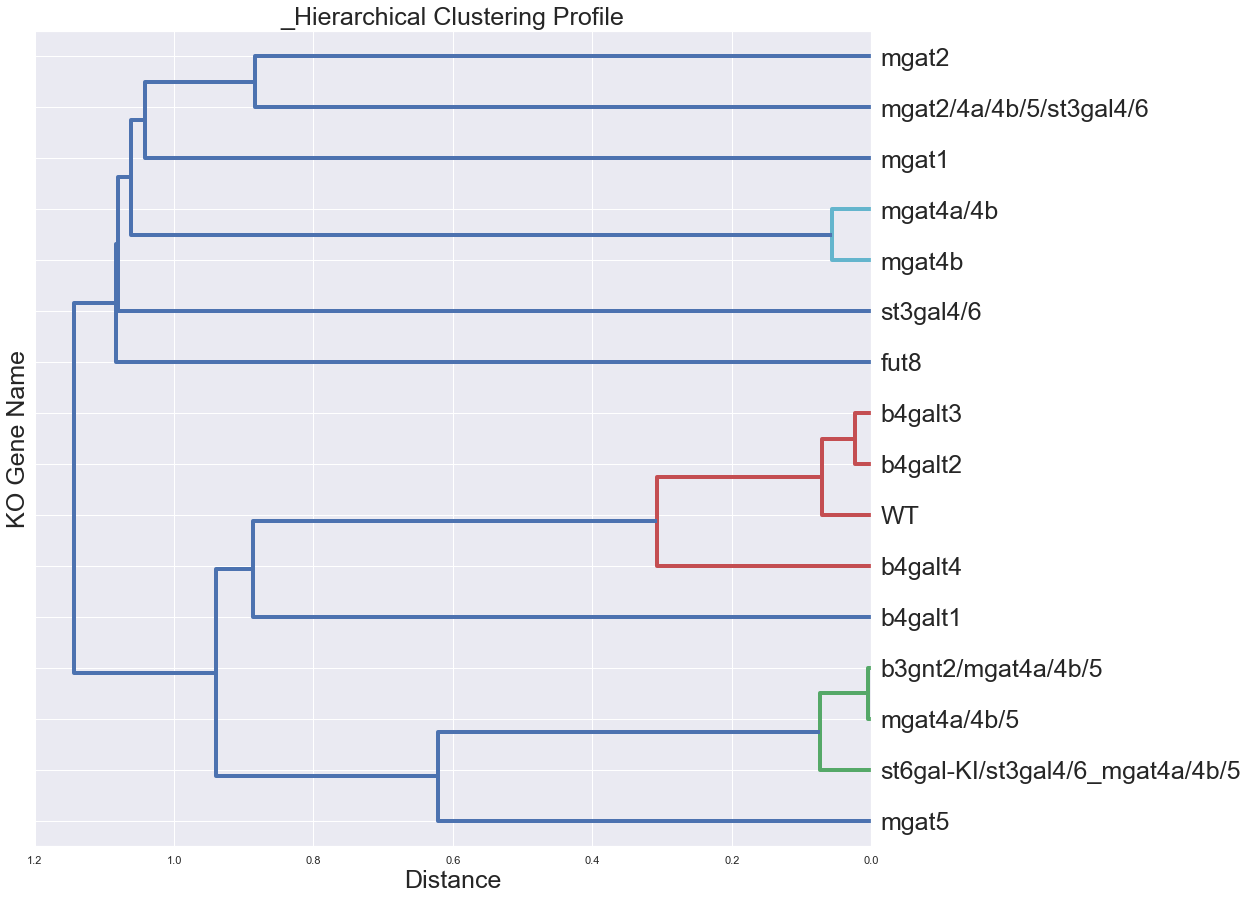

In [25]:
# reload(clustering_analysis)
glycoprofile_cluster_dict = clustering_analysis.draw_profile_cluster(g=cluster_grid,
                                                                     df=abd_table,
                                                                     profile_name=[],
                                                                     fig_size=(15,15),
                                                                     color_threshold=0.5,
                                                                     address=keywords_dict['plot_output_dir'] + 'pseudo_glycan_profile_clustering.eps')

In [26]:

"""generating the glycoprofile naming"""

glycan_substructure_occurance_dict_addr = keywords_dict['glycan_substructure_occurance_dict_addr']
# substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
glycoprofile_list_addr = keywords_dict['glycoprofile_list_addr']
glycan_identifier_to_structure_id = {}
naming = list(naming_abd_dict.keys())
for i in profile_columns:
    glycan_identifier_to_structure_id[i] = dict(zip(naming, naming))
match_dict = glycan_io.load_match_dict_from_json(glycan_substructure_occurance_dict_addr)
# print(naming_abd_dict)
profile_name = []

glycoprofile_list = process_glycoprofiles.get_glycoprofile_list(glycan_identifier_to_structure_id,
                                                                naming_abd_dict,
                                                                match_dict,
                                                                profile_columns,
                                                                profile_name,
                                                                glycoprofile_list_addr,
                                                                get_existance=True)
table_generator = process_glycoprofiles.substructureAbdTableGenerator(glycoprofile_list)
substructure_abd_table = table_generator.table_against_wt_relative_abd()
substructure_abd_table.to_csv(substructure_abd_table_addr)
substructure_abd_table

,WT,mgat4a/4b/5,mgat4b,mgat5,mgat1,mgat2/4a/4b/5/st3gal4/6,b4galt1,b4galt2,b4galt3,b4galt4,mgat2,fut8,b3gnt2/mgat4a/4b/5,mgat4a/4b,st3gal4/6,st6gal-KI/st3gal4/6_mgat4a/4b/5
0,1.000000,1.000000,1.000000,1.000000,0.481719,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1.000000,1.000000,1.000000,1.000000
1,0.984965,0.972811,1.000000,0.934858,0.000000,0.079384,0.440096,0.939624,0.970567,0.994505,0.8923,1.000000,0.952270,0.967584,0.043216,0.985607
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,0.977235,0.000000,0.972897,0.578969,0.975287,0.982563,0.994505,1.0000,1.000000,0.986382,1.000000,1.000000,0.985607
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,0.481719,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.000000,1.000000,1.000000,1.000000,1.000000
7,0.984965,0.972811,1.000000,0.934858,0.000000,0.079384,0.440096,0.939624,0.970567,0.994505,0.8923,1.000000,0.952270,0.967584,0.043216,0.985607
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,0.977235,0.000000,0.972897,0.578969,0.975287,0.982563,0.994505,1.0000,1.000000,0.986382,1.000000,1.000000,0.985607


In [ ]:
substructure_abd_table.transpose().to_csv(substructure_abd_table_addr)

In [49]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']
substructure_glycoct_dict_addr

'/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/linkage_unspecified__substructure_glycoct_dict.json'

the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  722  substructures are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


({58: [83, 87, 96],
  83: [120, 142],
  87: [120, 125, 126, 127],
  96: [140, 142],
  120: [170, 171, 172],
  125: [162, 170, 181, 182, 184],
  126: [171, 181, 183],
  127: [172, 182, 183],
  140: [202],
  142: [202],
  162: [217, 228, 229],
  170: [217, 238, 239, 241],
  171: [238, 240],
  172: [239, 240],
  181: [228, 238, 252, 253, 259],
  182: [229, 239, 253, 254, 255, 256],
  183: [240, 253, 255, 258],
  184: [241, 256, 257, 259],
  202: [],
  217: [302, 303],
  228: [302, 315, 316],
  229: [303, 316, 317, 318],
  238: [302, 330, 331, 337],
  239: [303, 331, 332, 333, 334],
  240: [331, 333, 336],
  241: [334, 335, 337],
  252: [315, 330, 352, 360],
  253: [316, 331, 352, 353, 358, 359],
  254: [317, 332, 353, 354],
  255: [318, 333, 353, 355, 358],
  256: [334, 354, 355, 356, 359],
  257: [335, 356, 357, 361, 383],
  258: [336, 358],
  259: [337, 359, 360, 361],
  302: [417, 418],
  303: [418, 419, 420],
  315: [406, 417, 434, 439],
  316: [418, 434, 435, 438],
  317: [407, 419, 

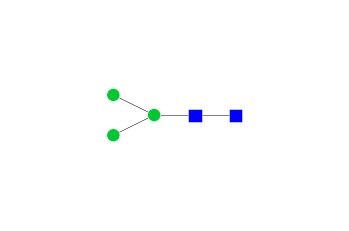

In [32]:
substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']

substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)
core = select_motifs.nglycan_core
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                                    glycan_core=core,
                                                    linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json
_substructure_lab.get_dependence_tree_core()

In [47]:
_substructure_with_core_vec = [_substructure_lab.substructure_vec[i] for i in _substructure_lab.substructure_with_core_list]
glycan_io.output_glycan_dict_to_glycoct_dict(_substructure_with_core_vec, '../example_data/merging_network/substructure_vec.json')

In [99]:
# json_utility.store_json(keywords_dict['output_data_dir']+'substructure_dep_tree_core.json',_substructure_lab.substructure_dep_tree_core)


In [100]:
# for i in _substructure_lab.substructure_dict[4]:
#     plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[i], label=True, title=i)

# loading tree

In [20]:
# rule_table = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/unspecified_intermediate_network.csv', index_col=0)
# set(rule_table['enzyme'])

In [16]:
# import pandas as pd
# # rule_table = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/substructure_dep_tree_core_with_enzyme.csv', index_col=0)
# edge_list = list(zip(rule_table.index_source,rule_table.index_target))
# dependence_tree= {}
# for i in range(len(_substructure_vec)):
#     dependence_tree[i]=[]
# for i in edge_list:
#     s,t = i
#     dependence_tree[s].append(t)
    
# nodes_stat = select_motifs.NodesState(dependence_tree, select_motifs.get_weight_dict(substructure_abd_table), linkage_specific=True)

# # plot_glycan_utilities.plot_glycan_list([_substructure_vec[i] for i in [186, 187, 311, 312, 313, 314, 466, 467, 468, 638]])

In [17]:
# _modified_edge_list = []
# enzyme_list = []
# start_node = []
# end_node = []
# for i in nodes_stat.dep_tree:
#     for j in nodes_stat.dep_tree[i]:
#         start_node.append(i)
#         end_node.append(j)
#         enzyme_list.append(rule_table[(rule_table.index_source==i) & (rule_table.index_target==j)].index[0])

In [18]:
# modified_table = rule_table[rule_table.index.isin(enzyme_list)]

In [19]:
# substructure_abd_table[substructure_abd_table.index.isin(set(end_node+start_node))]

In [31]:
select_motifs.get_weight_dict(substructure_abd_table)

{0: [0.9999999999999999,
  1.0,
  1.0,
  1.0,
  0.4817187725805675,
  0.9999999999999999,
  1.0000000000000002,
  1.0,
  1.0000000000000002,
  0.9999999999999998,
  1.0,
  0.0,
  0.9999999999999999,
  1.0,
  1.0,
  1.0],
 1: [0.9849648880619409,
  0.972811230144071,
  1.0,
  0.9348575933773529,
  0.0,
  0.07938388625592417,
  0.4400955970217851,
  0.9396240410704875,
  0.9705668108354201,
  0.994504579517069,
  0.8923,
  1.0,
  0.9522696929238984,
  0.967584349175912,
  0.04321589205397301,
  0.9856074766355141],
 2: [0.9999999999999999,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999999999999999,
  1.0000000000000002,
  1.0,
  1.0000000000000002,
  0.9999999999999998,
  1.0,
  1.0,
  0.9999999999999999,
  1.0,
  1.0,
  1.0],
 3: [0.9999999999999999,
  1.0,
  1.0,
  0.977234650635656,
  0.0,
  0.9728969194312795,
  0.5789686552072799,
  0.9752874348513537,
  0.9825631686774415,
  0.994504579517069,
  1.0,
  1.0,
  0.9863818424566086,
  1.0,
  1.0,
  0.9856074766355141],
 4: [0.9999999999999999,
 

Start dropping nodes with weight zero, nodes count: 666
Nodes left [199, 281, 285, 388, 395, 396, 525, 526, 536, 537, 538, 539, 687, 688, 691, 697, 707, 708, 709, 710, 711, 712, 871, 873, 874, 879, 884, 888, 900, 901, 902, 903, 904, 905, 906, 1063, 1064, 1067, 1069, 1071, 1075, 1079, 1081, 1084, 1089, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1247, 1249, 1251, 1253, 1255, 1259, 1260, 1262, 1265, 1270, 1273, 1277, 1280, 1290, 1291, 1292, 1293, 1294, 1295, 1408, 1409, 1411, 1413, 1417, 1418, 1420, 1422, 1425, 1426, 1429, 1433, 1436, 1438, 1443, 1449, 1450, 1451, 1452, 1533, 1535, 1537, 1538, 1540, 1542, 1545, 1546, 1548, 1552, 1553, 1555, 1560, 1563, 1566, 1567, 1618, 1620, 1621, 1622, 1624, 1626, 1630, 1631, 1634, 1635, 1638, 1640, 1668, 1669, 1671, 1673, 1674, 1677, 1678, 1691, 1693, 1694, 1699]
666 2185
_a.nodes 666
_a.nodes 666
merged_weights_dict 666
After first drop 514 + 152 =  666 666.0
mod_nodes 152
mod_edges 321


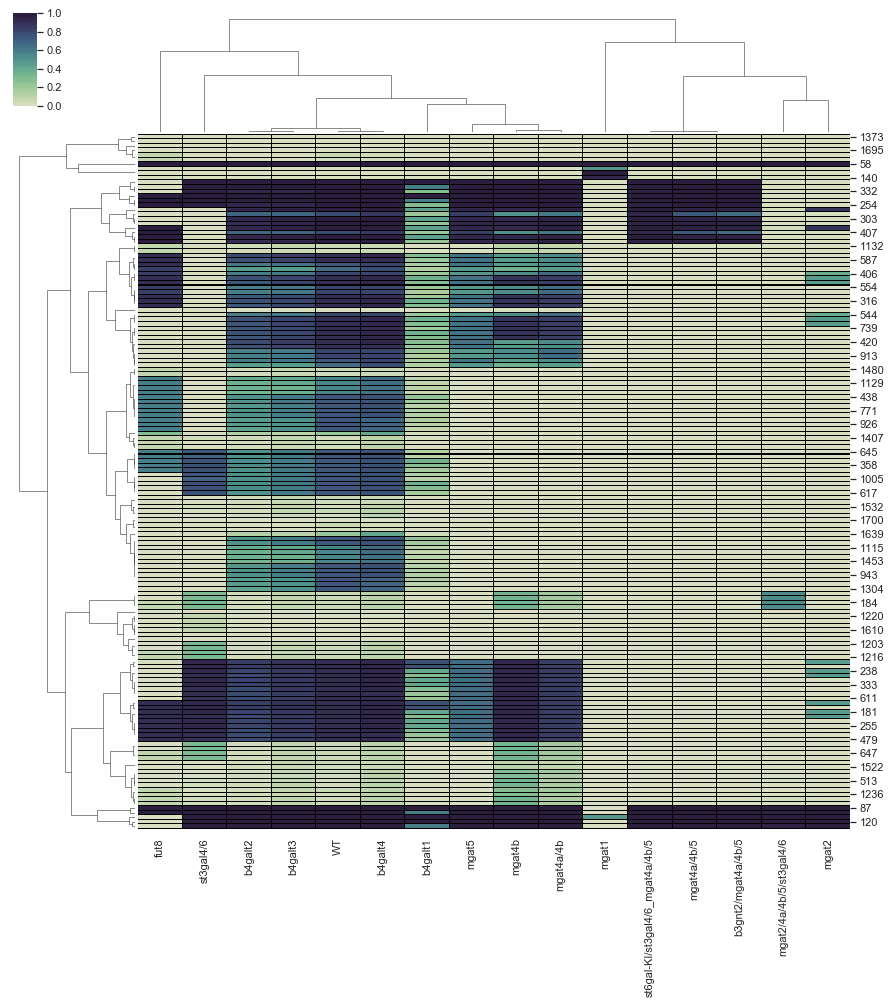

In [34]:
# reload(select_motifs)
a_node_state = select_motifs.NodesState(_substructure_lab.substructure_dep_tree_core, select_motifs.get_weight_dict(substructure_abd_table), linkage_specific=False)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
    drop_parellel=False, drop_diff_abund=False)
# print('_substructure_lab.core_index',_substructure_lab.core_index)
# if _substructure_lab.core_index in mod_nodes:
#         mod_nodes.remove(_substructure_lab.core_index)
#         print("Removed core, the index is", _substructure_lab.core_index)
motif_dict = {}
for i in mod_nodes:
    motif_dict[i] = _substructure_lab.substructure_vec[i]
glycan_io.output_glycan_dict_to_glycoct_dict(motif_dict, keywords_dict['motif_glycoct_dict_addr'])

motif_abd_table = substructure_abd_table[substructure_abd_table.index.isin(mod_nodes)]
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.transpose().to_csv(motif_abd_table_addr)
motif_abd_table
# for i in mod_nodes:
#     plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[i], 
#                                       title=i, 
#                                       label=True,
#                                       addr=keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')

#     plt.savefig()
#     print(keywords_dict['plot_output_dir'] + 'motif_'+str(i)+'.eps')
# keywords_dict['abundance_table.csv'] = 
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, )
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
#                                            motif_abd_table=motif_abd_table, 
#                                            select_profile_name = selected_name_list)
selected_name_list = motif_abd_table.columns.tolist()

    # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
    # motif_abd_table.to_csv(os.path.join(keywords_dict['intermediate_dir'],
    #                                     str(len(selected_name_list)) + r"selected_abundance_matrix.txt"))
    # motif_abd_table.colmuns = selected_name_list

    # plt.savefig(keywords_dict['plot_output_dir'] + 'pseudo_profile_clustering.svg')
# motif_abd_table.drop()
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=motif_abd_table,
                                                              address=keywords_dict[
                                                                          'plot_output_dir'] + 'pseudo_profile_clustering.eps',
                                                              metric="correlation",
                                                              cmap=sns.cubehelix_palette(40, start=.5, rot=-.75),
                                                              linewidths=0.01,
                                                              figsize=(15,15),
                                                              linecolor='black',
                                                              method='complete')

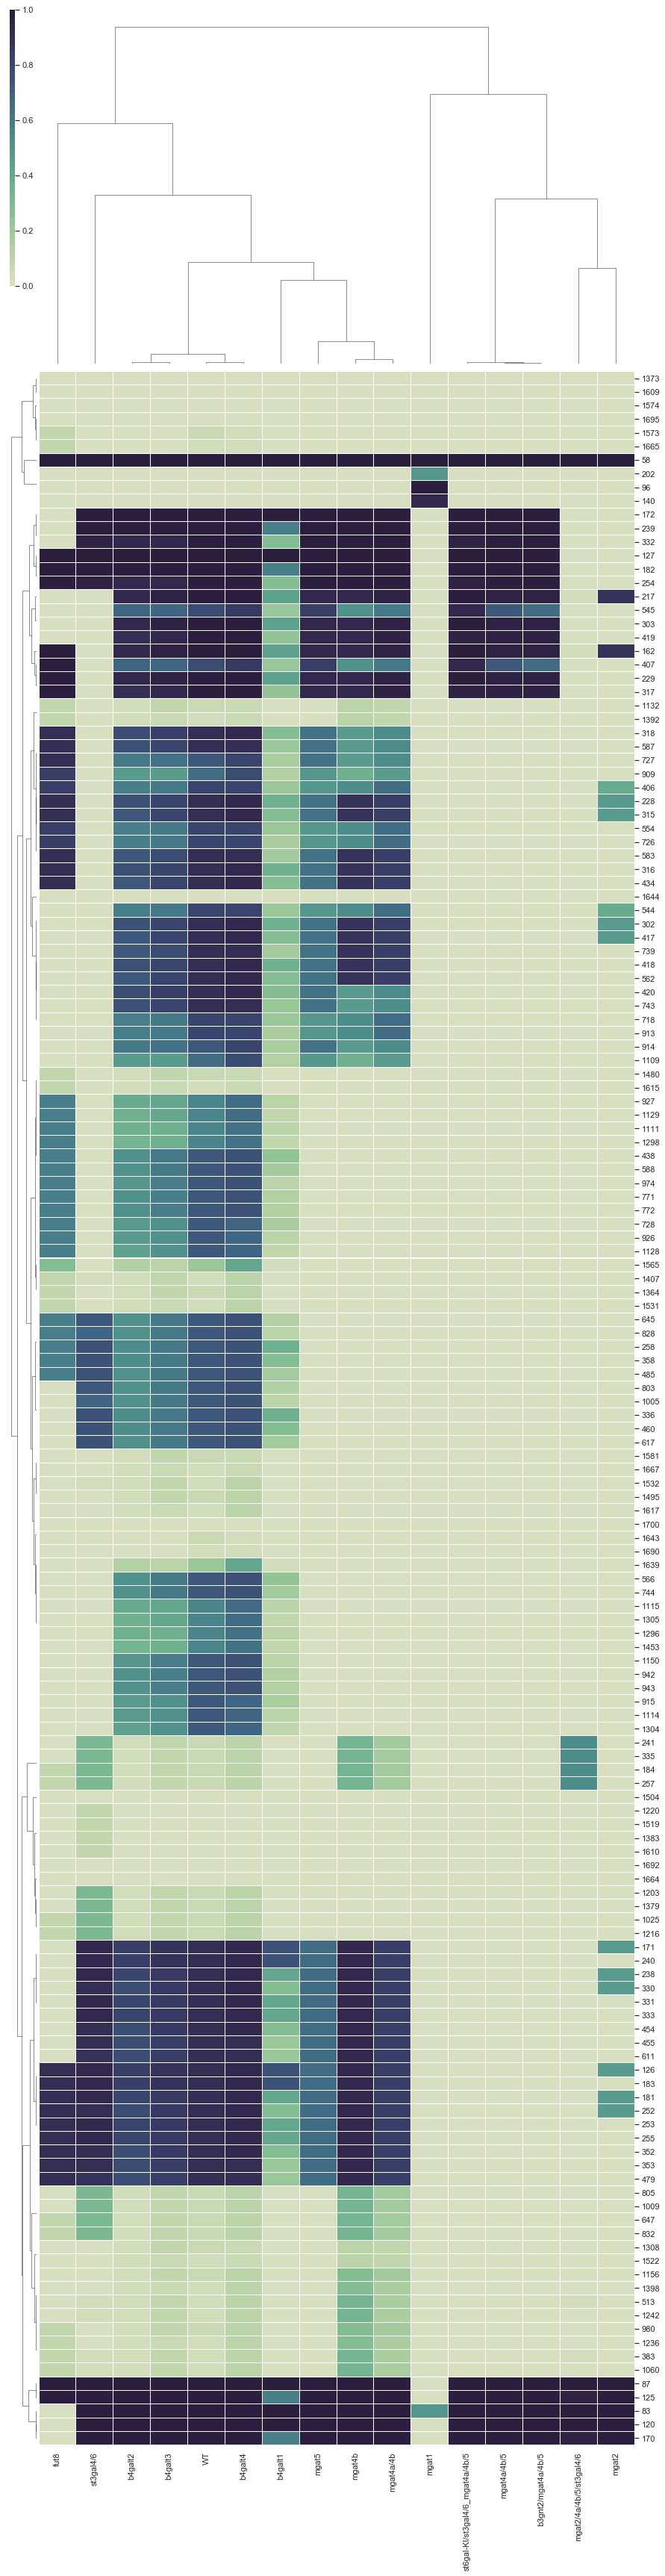

In [35]:
motif_abd_table=motif_abd_table
address=keywords_dict[
          'plot_output_dir'] + 'pseudo_profile_clustering.eps',
metric="correlation"
cmap=sns.cubehelix_palette(40, start=.5, rot=-.75)
linewidths=0.01
figsize=(15,60)
linecolor='white'
method='complete'


    # draw clustermap
g = sns.clustermap(motif_abd_table,
                       metric=metric,
                       cmap=cmap,
                       linewidths=linewidths,
                       figsize=figsize,
                       linecolor=linecolor,
                       method=method,
                  col_cluster=True)

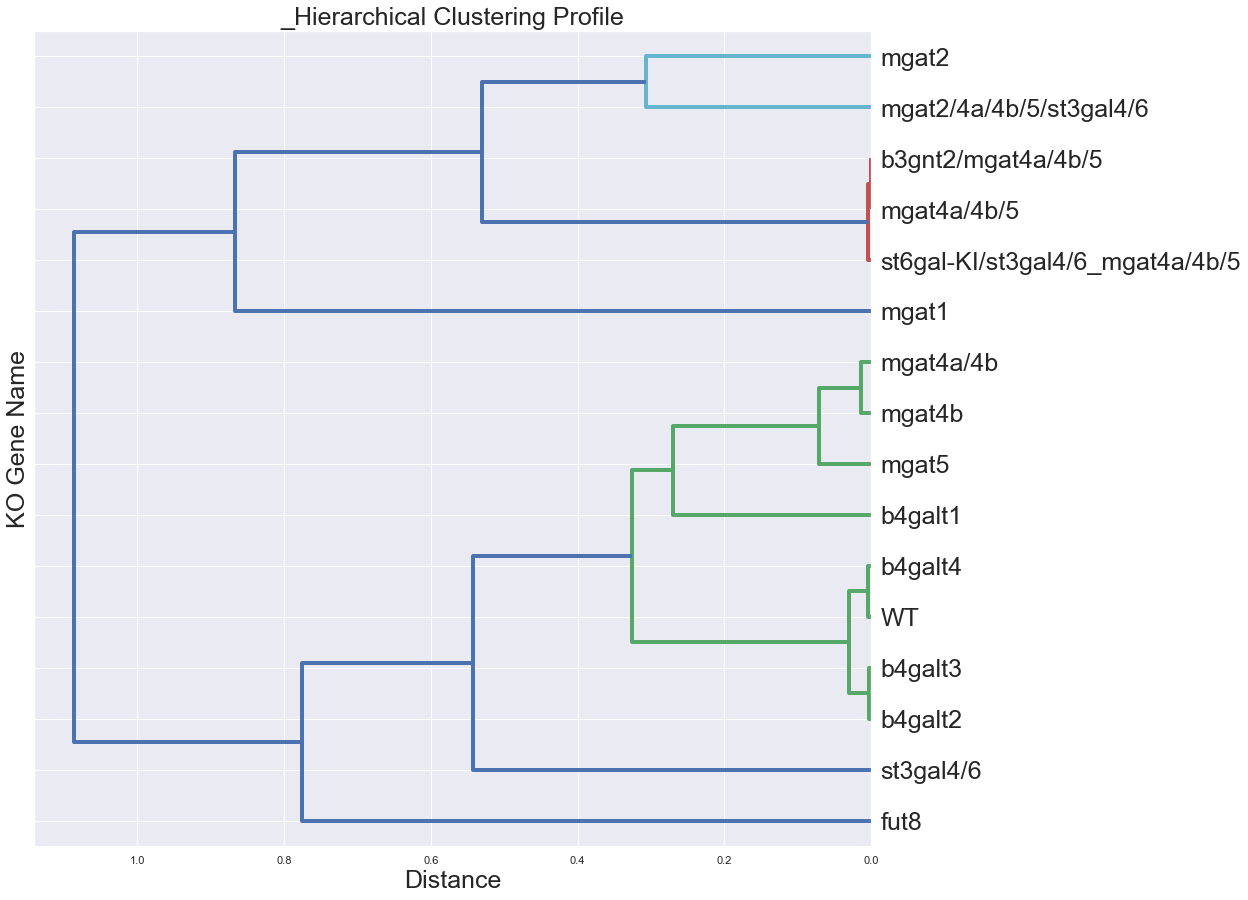

In [36]:
# reload(clustering_analysis)
glycoprofile_cluster_dict = clustering_analysis.draw_profile_cluster(g=g,
                                                                     df=motif_abd_table,
                                                                     profile_name=[],
                                                                     fig_size=(15,15),
                                                                     color_threshold=0.5,
                                                                     address=keywords_dict['plot_output_dir'] + 'profile_clustering.svg')


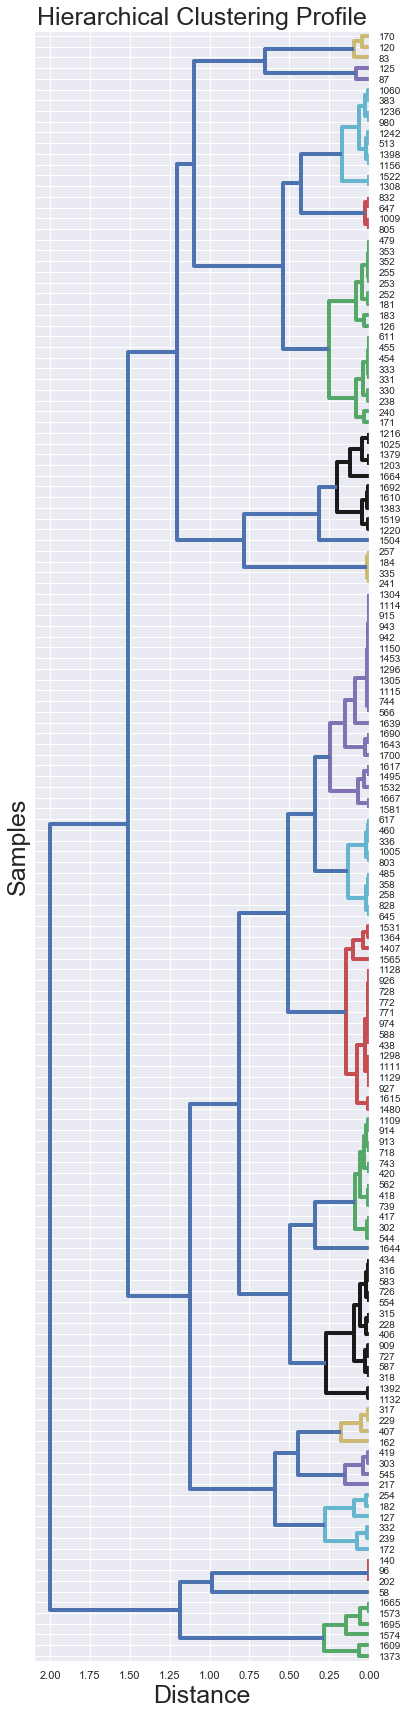

In [37]:
glyco_motif_cluster_dict = clustering_analysis.draw_motif_cluster(g=g,
                                                                  df=motif_abd_table,
                                                                  color_threshold=0.30,
                                                                  address=keywords_dict[
                                                                              'plot_output_dir'] + 'motif_cluster.eps',
                                                                  fig_size=(6, 30),
                                                                  )


[179, 402]
[88, 130, 217, 272, 281, 285, 343, 347, 414, 427, 469, 480, 509, 515, 534]
[5, 10]
[12, 20, 24, 39]
[26, 41, 44, 67, 70, 104, 110, 151, 159, 207]
[9, 19, 21, 37, 38, 40, 65, 66, 103]
[4, 11, 13, 22, 23, 25, 42, 43, 69]
[3, 8]
[0]
[2]
[14, 27, 28, 47]
[50, 52, 80, 81, 84, 86, 112, 123, 128, 153, 163, 211]
[46, 76, 121, 122, 127, 173, 174, 175, 177, 178, 202, 232, 235, 236, 253, 291, 294, 309, 355, 415]
[64, 99, 135, 143, 144, 185, 186, 196, 238, 242, 243, 304, 332, 362, 384, 422, 439, 473]
[96, 139, 183, 188, 189, 239, 240, 247, 303, 305, 306, 374, 393, 423, 444, 475, 490, 491, 512, 531, 532, 542]
[7, 16]
[18, 32, 35, 56, 59, 90]
[17, 33, 34, 36, 55, 61, 63, 91, 97, 98, 126, 133, 134, 176, 180, 246, 352]
[450, 492]
[31, 57, 58, 60, 89, 93, 95, 131, 137, 138, 181, 182, 237]
[1, 6, 15]
[129, 341, 468]
[390, 441, 442, 506, 510, 537]


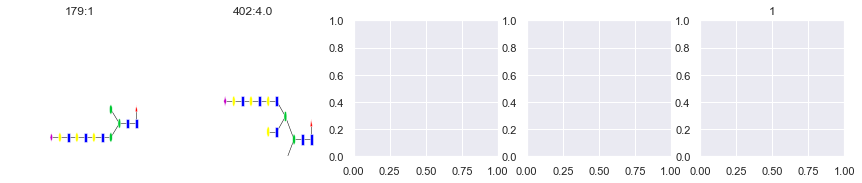

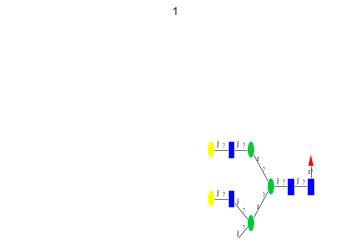

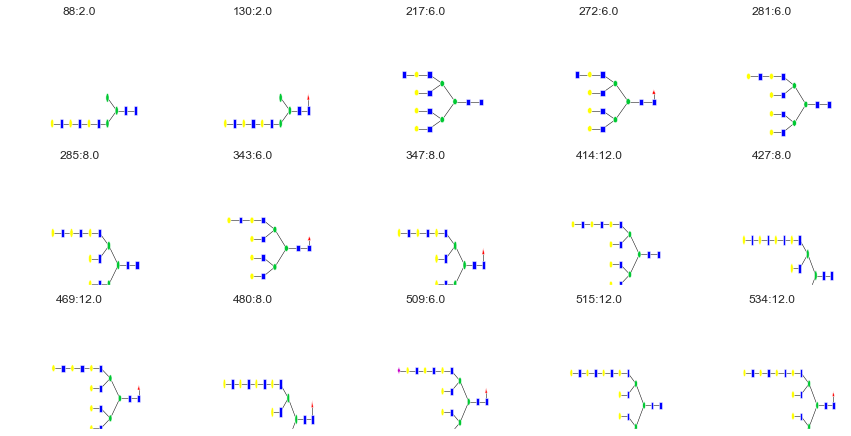

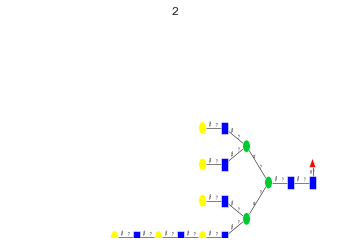

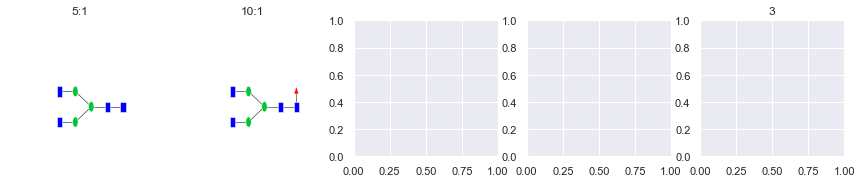

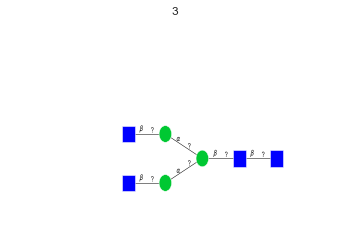

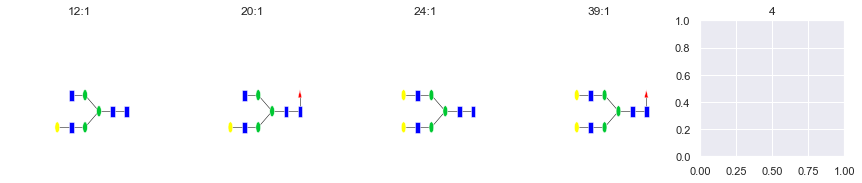

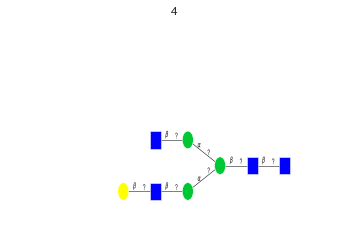

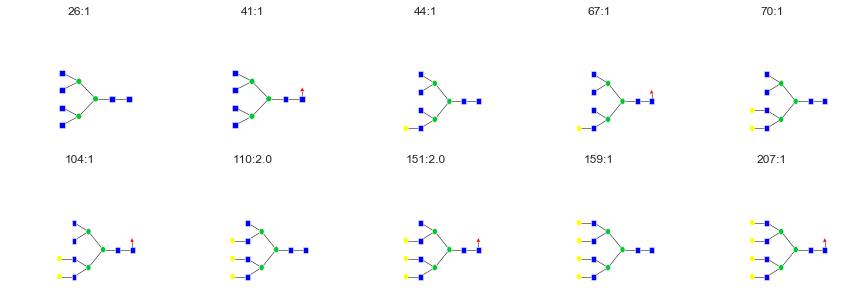

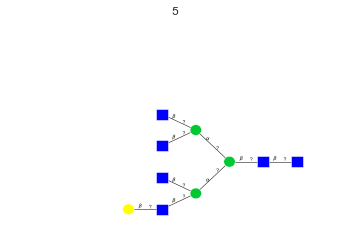

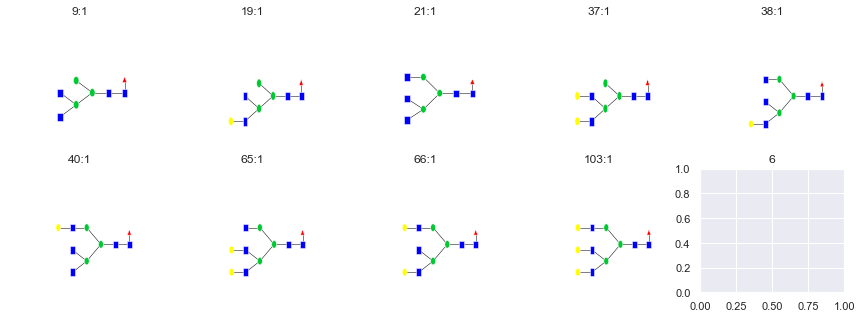

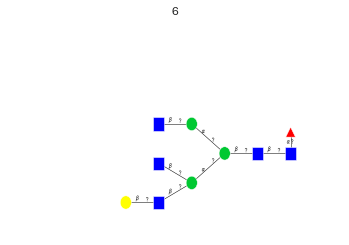

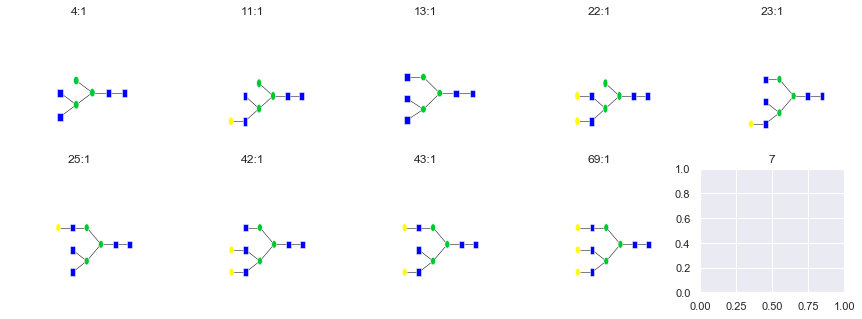

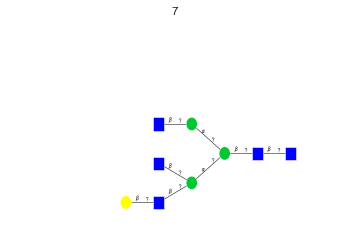

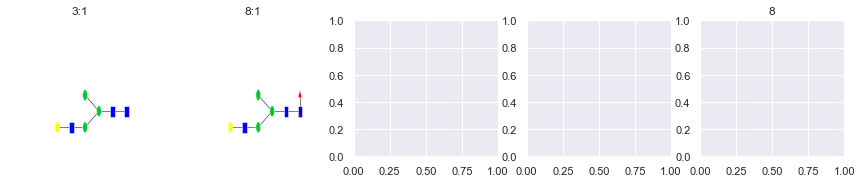

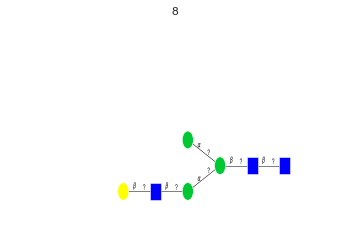

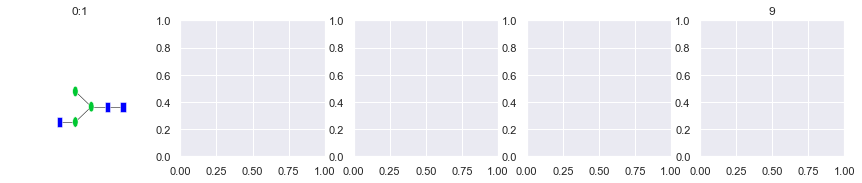

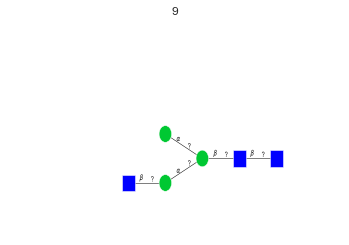

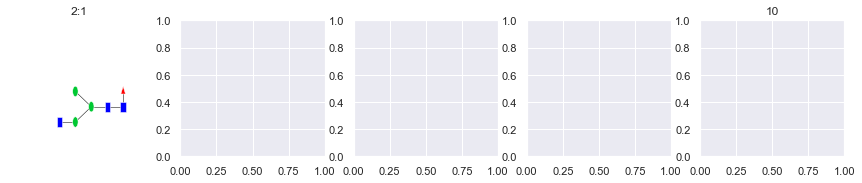

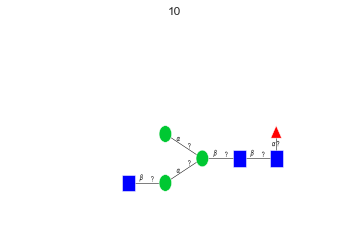

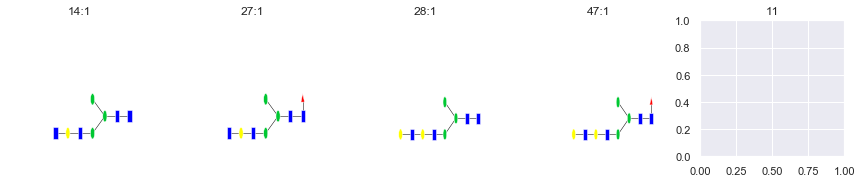

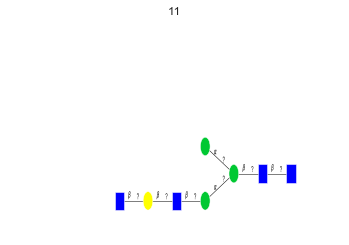

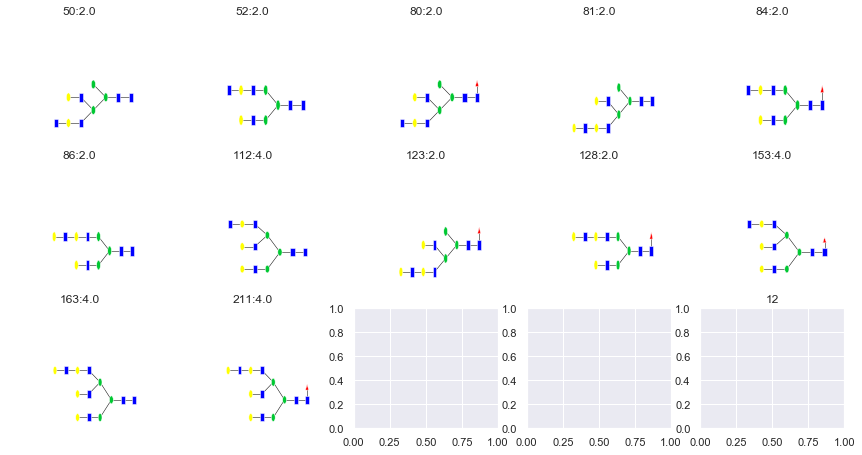

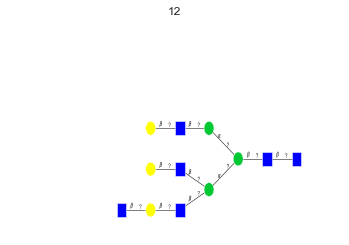

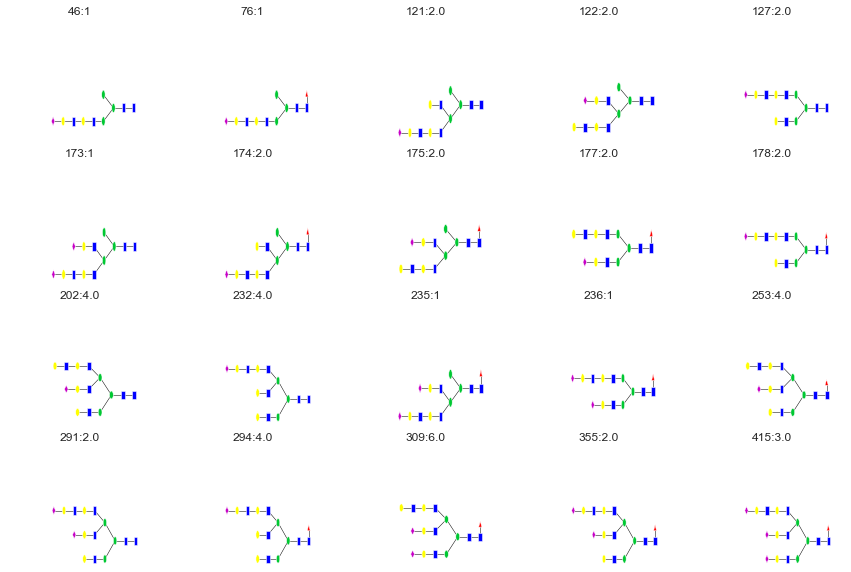

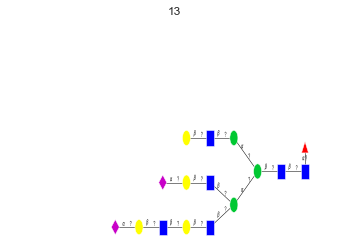

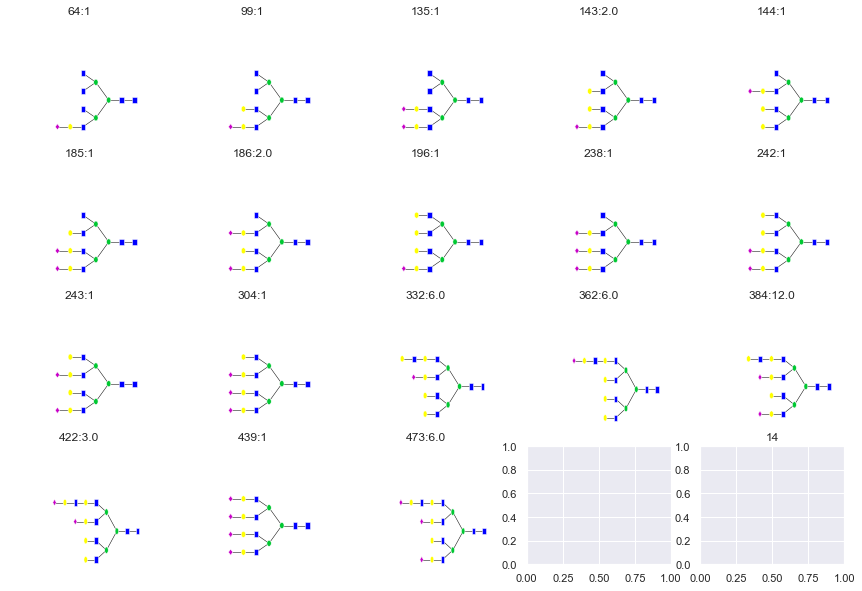

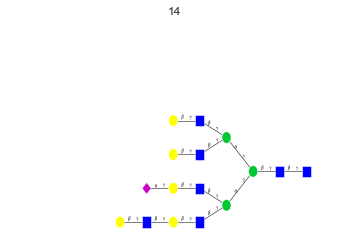

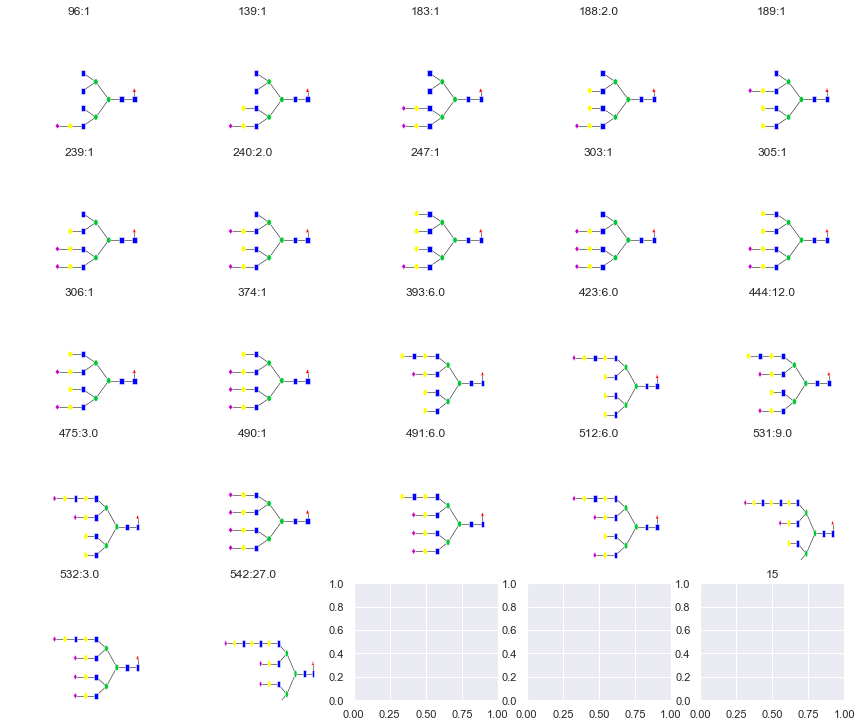

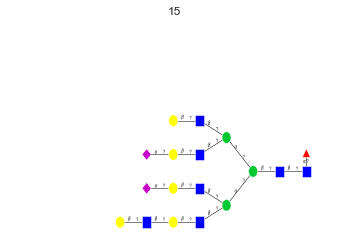

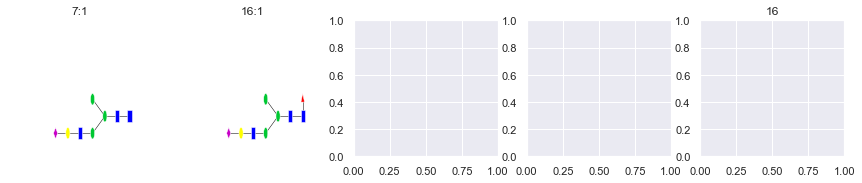

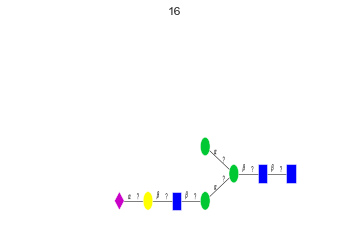

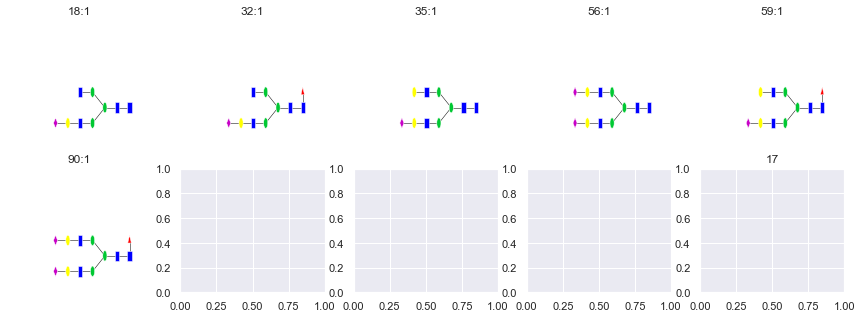

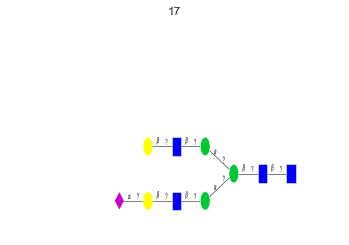

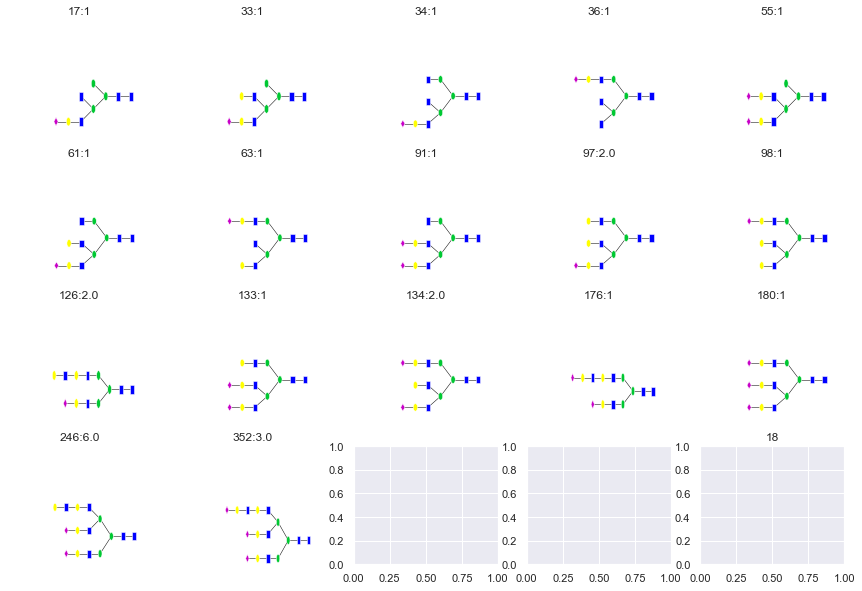

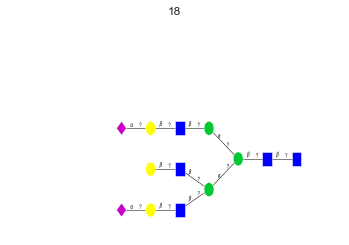

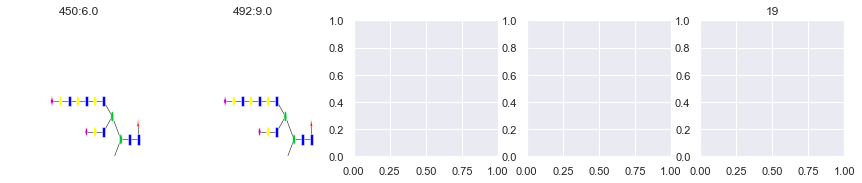

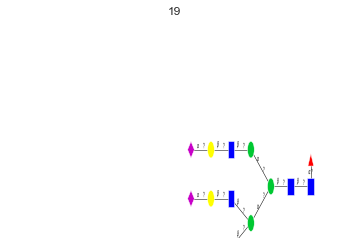

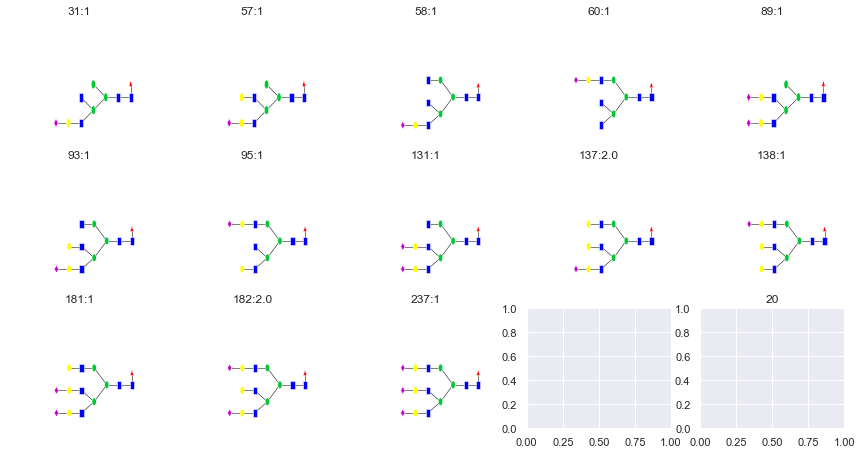

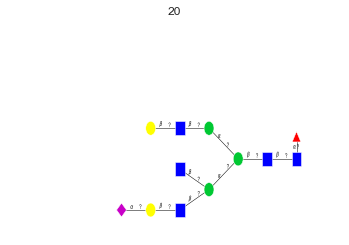

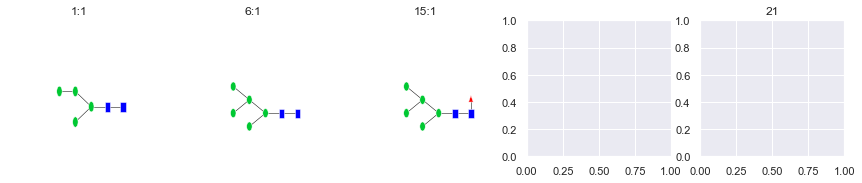

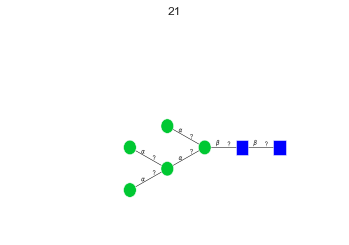

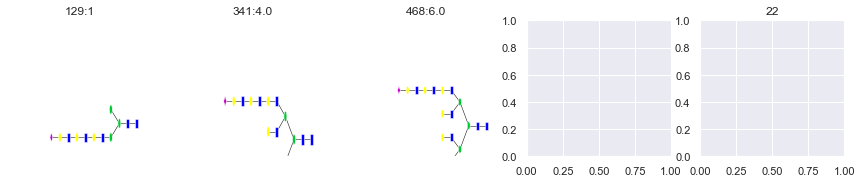

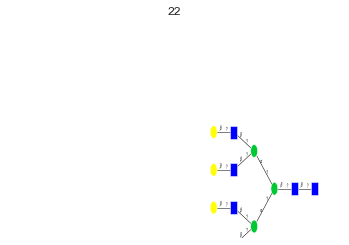

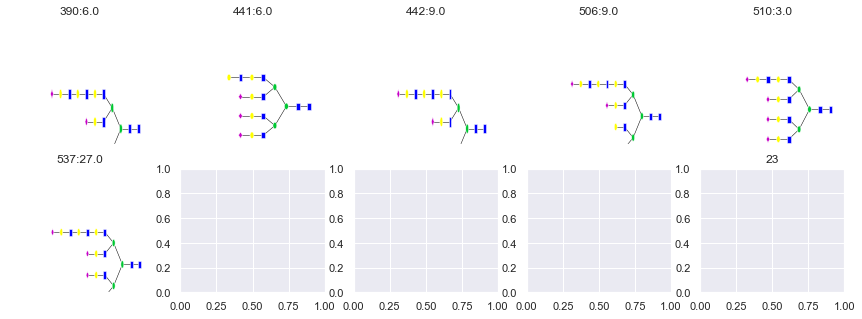

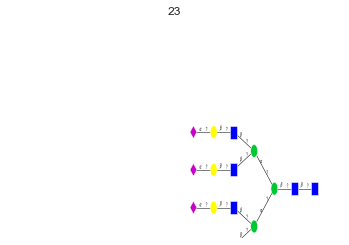

In [43]:

# reload(clustering_analysis)
# reload(pipeline_functions)
rep_list = pipeline_functions.draw_substructure_representative_pip(glyco_motif_cluster=glyco_motif_cluster_dict,
                                                        substructure_vec=_substructure_vec,
                                                        motif_weights_dict=merged_weights_dict,
                                                        plot_all_substructure=True,
                                                        address_dir=keywords_dict['plot_output_dir'],
                                                        threshold=0.51,
                                                        plot_rep=True)

In [ ]:
plot_glycan_utilities.plot_glycan(_substructure_vec[469], label=True)
plot_glycan_utilities.plot_glycan(_substructure_vec[639], label=True)

In [ ]:
_substructure_vec[469]

In [ ]:
for i in range(1,len(profile_dict)+1):
    for j in profile_dict[i]:
        profile_Gly.append(j)
        profile_name_order.append(j)
def generate_weight(vec_, merged_weights_dict):
    weight_vec = [merged_weights_dict[i] for i in vec_]
    _sum =sum(weight_vec)
    return [i/_sum for i in weight_vec]


substructure_table = np.zeros((len(glyco_motif_cluster_dict),16))
for i in range(1,len(glyco_motif_cluster_dict)+1):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    temp_table = np.array(temp_table)
    _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    _substructure_vec = np.zeros((1,16))
    for idex, j in enumerate(temp_table):
        _substructure_vec += j*_weight_vec[idex]
#     scaler = preprocessing.StandardScaler().fit(temp_table)
    substructure_table[i-1,] = _substructure_vec[0,]

In [ ]:

substre_profile=pd.DataFrame(data=substructure_table.transpose(), index=profile_name_order, columns=range(1,25))
substre_profile=substre_profile[[i for i in rearanged_list]]
fig, ax = plt.subplots(figsize=(16,5))
substre_profile=substre_profile.round(5)
substre_profile.to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_abundance_representatives.csv")
sns.heatmap(substre_profile.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 25), linewidths=.01, linecolor='white')
plt.title('Substructure representative table', size=20)
plt.tight_layout()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_raw_abundance_sub.eps')
plt.show()